# Proyecto prefabricado 1

#### Descripción y propósito

Usted trabaja en la tienda en línea «Strimchik», que vende juegos de ordenador en todo el mundo. Los datos de código abierto sobre ventas de juegos, evaluaciones de usuarios y expertos, géneros y plataformas (como Xbox o PlayStation) están disponibles. Necesitas identificar patrones de éxito. Esto te permitirá apostar por un producto potencialmente popular y planificar campañas publicitarias.


## Ver conjunto de datos

Abramos y estudiemos los datos preparados para nosotros.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


La fecha contiene 11 columnas que contienen datos del juego: título, plataforma del juego, año de lanzamiento, género, ventas en América del Norte, Europa y Japón (mil. copias), otras ventas, puntuaciones críticas, clasificaciones de jugadores y clasificaciones de edad.

En la columna "Título" 2 pases - interesante ¿cómo puede el juego ser sin título? Lo más probable es que haya un error.
Unos 250 juegos no tienen año de lanzamiento. Veremos si los necesitamos más tarde.
Dos juegos no tienen un género.
Las omisiones más fuertes se pueden ver en las puntuaciones críticas y de los jugadores, así como en la clasificación por edades.

En los tipos de datos es necesaria la columna "el Año del lanzamiento" - el número entero, y "la Calificación de los jugadores" - numérico, tanto como en "la Calificación de los críticos".

## Preparación de datos

#### Cambiar el nombre de las columnas
Minúsculas para todas las columnas.

In [2]:
data.columns = map(str.lower, data.columns)

In [3]:
data.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Convertir tipos de datos

Como ya se mencionó anteriormente, vamos a cambiar los tipos de datos para las columnas "Año de lanzamiento" a todo y para "Clasificación de los jugadores" a número real.

#### Trabajando con el año de columna
Antes de cambiar el tipo de años de lanzamiento, echa un vistazo a los valores que faltan. 

In [4]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Su 269 - esto es aproximadamente el 1% del número total. Creo que se pueden quitar de forma segura, porque no deben afectar el resultado general. No deben ser. Sin embargo, en algunos títulos se puede ver que el año simplemente no se extiende al campo requerido. Veamos cuántas filas de este tipo y mover los datos al campo deseado.

In [5]:
data0 = (data[data['year_of_release'].isna() == True])

In [6]:
data0[data0['name'].str.contains('19', na = False)] 
data0[data0['name'].str.contains('20', na = False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
1650,NASCAR Thunder 2003,PS2,NaN,Racing,0.60,0.46,0.00,0.16,84.0,8.7,E
2492,MLB SlugFest 20-03,PS2,NaN,Sports,0.41,0.32,0.00,0.11,77.0,8.2,E
2572,PES 2009: Pro Evolution Soccer,PSP,NaN,Sports,0.04,0.33,0.26,0.17,NaN,NaN,NaN
3486,Madden NFL 2002,XB,NaN,Sports,0.53,0.02,0.00,0.03,90.0,8.1,E
4775,NFL GameDay 2003,PS2,NaN,Sports,0.20,0.15,0.00,0.05,60.0,tbd,E
5156,NBA Live 2003,XB,NaN,Sports,0.31,0.04,0.00,0.01,82.0,8.8,E
5336,Tomb Raider (2013),PC,NaN,Action,0.06,0.25,0.00,0.04,86.0,8.5,M


In [7]:
data.at[183, 'year_of_release'] = 2004
data.at[377, 'year_of_release'] = 2004
data.at[475, 'year_of_release'] = 2006
data.at[1650, 'year_of_release'] = 2003
data.at[2492, 'year_of_release'] = 2003
data.at[2572, 'year_of_release'] = 2009
data.at[3486, 'year_of_release'] = 2002
data.at[4775, 'year_of_release'] = 2003
data.at[5156, 'year_of_release'] = 2003
data.at[5336, 'year_of_release'] = 2013
data.at[5655, 'year_of_release'] = 2005
data.at[5889, 'year_of_release'] = 2003
data.at[6954, 'year_of_release'] = 2002 #загуглил значение, раз уж попало в выборку 
data.at[8918, 'year_of_release'] = 2005
data.at[13195, 'year_of_release'] = 2011
data.at[13929, 'year_of_release'] = 2006
data.at[15953, 'year_of_release'] = 2008
data.at[16079, 'year_of_release'] = 2007
data.at[16373, 'year_of_release'] = 2008

In [8]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
...,...,...,...,...,...,...,...,...,...,...,...
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Eliminar los restantes 250 valores y convertir años en enteros.

In [9]:
data.dropna(subset = ['year_of_release'], inplace = True)
data['year_of_release'] = data['year_of_release'].astype('int')
data.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16460,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16461,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16462,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16463,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


#### Trabajando con la columna user_score

Ya hay muchos pases, y no puedes borrarlos. Pero no tenemos que hacerlo. El hecho de que el juego no tiene una calificación de usuario es normal, tal vez es solo nuevo o no lo suficientemente popular (hay calificaciones, pero son pocos y no forman un común). De las líneas anteriores podemos ver que además de los NaNs hay un cierto texto tbd - que se determinted, en el lenguaje de la jerga que significa que la evaluación se espera en el futuro - confirmación justa de nuestra suposición. Dado que las puntuaciones generalmente se pueden establecer de 1 a 10, reemplace todas las omisiones y los ceros tbd. A menudo en el contenido de sitios agregadores sin calificación se ve así.

In [10]:
data['user_score'] = data['user_score'].fillna(value=0)
data.loc[data['user_score'] == 'tbd', 'user_score'] = 0

Aproveche esta oportunidad para reemplazar las omisiones en la columna critic_score

In [11]:
data['critic_score'] = data['critic_score'].fillna(value=0)

Ahora vamos a cambiar el tipo en la columna de valoración de usuario a numérico.

In [12]:
data['user_score'] = data['user_score'].astype('float')

### Trabajar con saltos

Ya hemos procesado algunos de los pases. Examinaremos otras columnas.

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16465 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16463 non-null  object 
 1   platform         16465 non-null  object 
 2   year_of_release  16465 non-null  int64  
 3   genre            16463 non-null  object 
 4   na_sales         16465 non-null  float64
 5   eu_sales         16465 non-null  float64
 6   jp_sales         16465 non-null  float64
 7   other_sales      16465 non-null  float64
 8   critic_score     16465 non-null  float64
 9   user_score       16465 non-null  float64
 10  rating           9780 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Dos columnas son las más sospechosas: el nombre y el género, faltan dos valores. Encuéntralas.

In [14]:
data[data['name'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0.0,0.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0.0,0.0,NaN


In [15]:
data[data['genre'].isnull() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,0.0,0.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,0.0,0.0,NaN


Estas son las mismas líneas sin información útil. Borrémoslas.

In [16]:
data = data.drop(index=[659 , 14244])

Hubo la última columna con los pases - la clasificación de edad, y más de la mitad. Parece que la mejor solución es sustituir las omisiones por la designación neutra "desconocido".

In [17]:
data['rating'] = data['rating'].fillna(value='unknown')

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16463 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16463 non-null  object 
 1   platform         16463 non-null  object 
 2   year_of_release  16463 non-null  int64  
 3   genre            16463 non-null  object 
 4   na_sales         16463 non-null  float64
 5   eu_sales         16463 non-null  float64
 6   jp_sales         16463 non-null  float64
 7   other_sales      16463 non-null  float64
 8   critic_score     16463 non-null  float64
 9   user_score       16463 non-null  float64
 10  rating           16463 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


El trabajo en los pases está completo. Algunos de ellos se debieron a entradas incorrectas en el formato del título, datos insuficientes (poca o ninguna calificación) o información incompleta del juego.

### Ventas totales

Datafrem está casi listo para análisis. Agregue una columna con ventas totales en todas las regiones.

In [19]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [20]:
data[data.duplicated(subset=['name','platform'], keep=False)].sort_values(by='name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E,0.01
1190,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08


Sólo unas pocas tomas. Googled about Need for Speed Most Wanted, como yo lo entendí, y un juego completamente diferente lanzado en 2012 con el mismo nombre, por lo que no es un doble. Por supuesto, es confuso que tengan las mismas puntuaciones, pero parece que los datos están cargados incorrectamente. Dejaría estos dos juegos como diferentes, especialmente porque tienen datos de ventas diferentes y no los necesitamos mucho en el análisis.
Pero tomar Madden NFL13 con casi cero ventas voy a quitar, no da nada.

In [21]:
data = data.drop(index=[16230])

## Análisis de datos de investigación

### Versiones por año

Veamos cuántos juegos se produjeron en diferentes años.

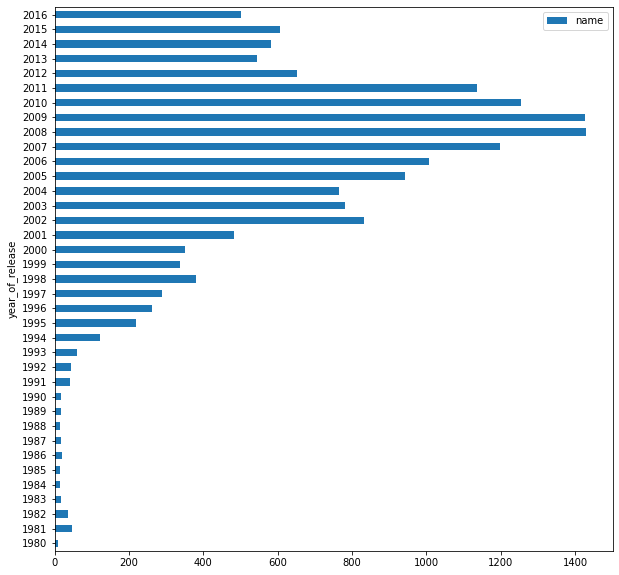

In [22]:
data.pivot_table(index='year_of_release', aggfunc='count', values='name').plot.barh(stacked=True, figsize=(10,10));

Vemos que el número máximo de juegos se lanzó en el período 2007-2011. Pero antes de 1994. Hay muy pocos juegos. Y es comprensible, porque las consolas de juegos en ese momento era muy poco y se consideraban un lujo. Quizás deberían fusionarse en un grupo de "juegos retro".



### Ventas por plataformas

Veamos cómo han cambiado las ventas en las plataformas.

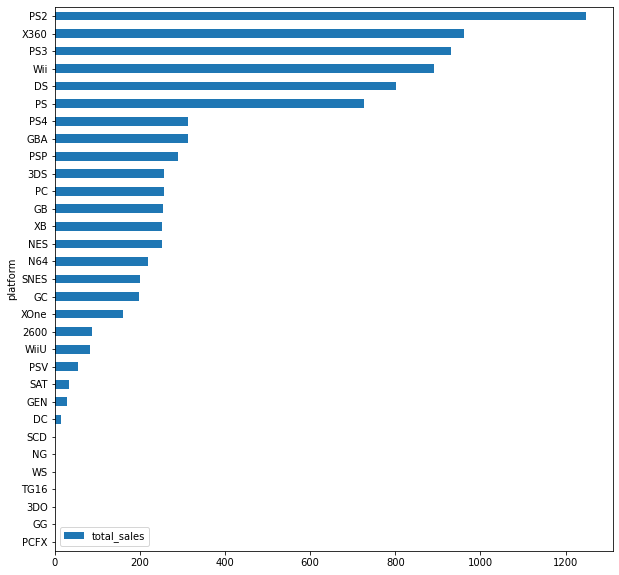

In [23]:
sales = data.pivot_table(index='platform', aggfunc='sum', values='total_sales').sort_values(by='total_sales').plot.barh(stacked=True, figsize=(10,10));

El mayor número de juegos vendidos en PlayStation 2. Sin embargo, las ventas en las plataformas SCD, NG, WS, TG16, 3DO, GG y PCFX son insignificantes.

Haremos la distribución año a año de las 6 mejores consolas de videojuegos con las máximas ventas.

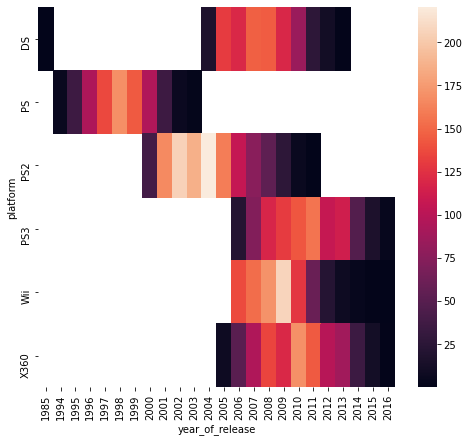

In [24]:
top = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
sales = data[data.platform.isin(top)]

sales2 = sales.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc='sum')
plt.figure(figsize=(8,7))
sns.heatmap(sales2);

Vemos un patrón de altas ventas de juegos desde el lanzamiento de la consola de juegos y durante ~ 10 años. Y en el ejemplo de la PlayStation en el lanzamiento de la nueva versión de unos 5 años más de ventas para el anterior, después de lo cual se detienen por completo. 
El DS tiene un lanzamiento en 1985. Parece un error. Encuentra estos valores.

In [25]:
data[(data['platform'] == 'DS') & (data['year_of_release'] == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,0.0,0.0,unknown,0.02


Parecen datos falsos. No se pudo encontrar información sobre este juego en Internet, y la DS se lanzó en 2004. Borremos esta línea.

In [26]:
data = data.drop(index=[15957])

### Período actual

Dejamos los datos solo para el período actual. Para futuras ventas solo estamos interesados en ellos.

Para ello, vamos a construir otro gráfico de ventas, pero en todas las plataformas.

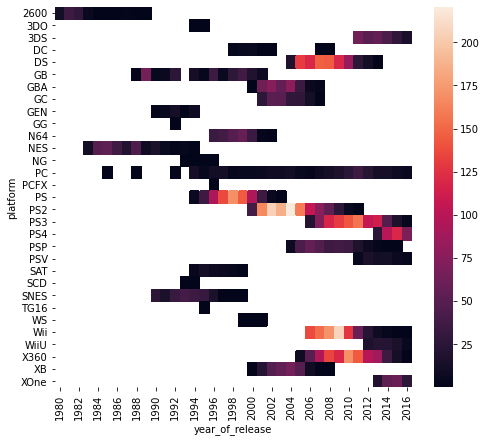

In [27]:
sales3 = data.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc='sum')
plt.figure(figsize=(8,7))
sns.heatmap(sales3);

Vemos que el mayor número de cruces en el período 2013-2016 es de 4 años. Parece que habrá juegos vendidos lanzados durante este período, además de los nuevos pueden ser liberados. Todo lo que solía ser eliminado en la comisión :)

In [28]:
data = data[(data['year_of_release'] > 2012)]

### Plataformas potencialmente rentables

Vamos a estimar a partir de la muestra obtenida qué plataformas están creciendo en ventas y cuáles están cayendo.

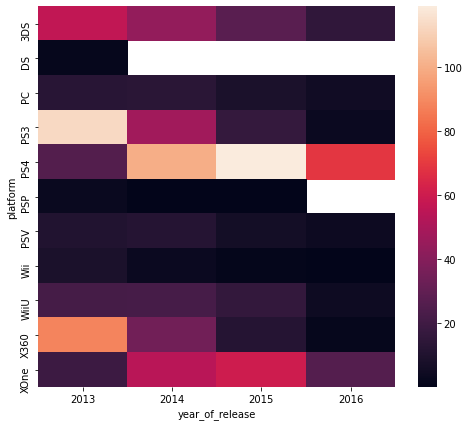

In [29]:
sales4 = data.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc='sum')
plt.figure(figsize=(8,7))
sns.heatmap(sales4);

Vemos que DS y PSP ya están fuera de venta - ya no estamos interesados en ellos. 
El 3DS, PS3, Wii, WiiU, PSV y X360 muestran una caída significativa en las ventas.
Para las ventas de PC no son muy altas, pero la caída también es insignificante. Hay personas que prefieren los juegos en el PC, puede dejar esta plataforma para la venta.
El PS4 y XOne han visto un crecimiento en las ventas, pero esto no es una buena cosa - nuevas plataformas (2016) y la mayoría de los juegos se lanzan en ellos. Estamos más interesados en ellos para las ventas.

### Ventas globales por plataformas

Construiremos una caja con bigote, dividiremos las ventas por plataforma.

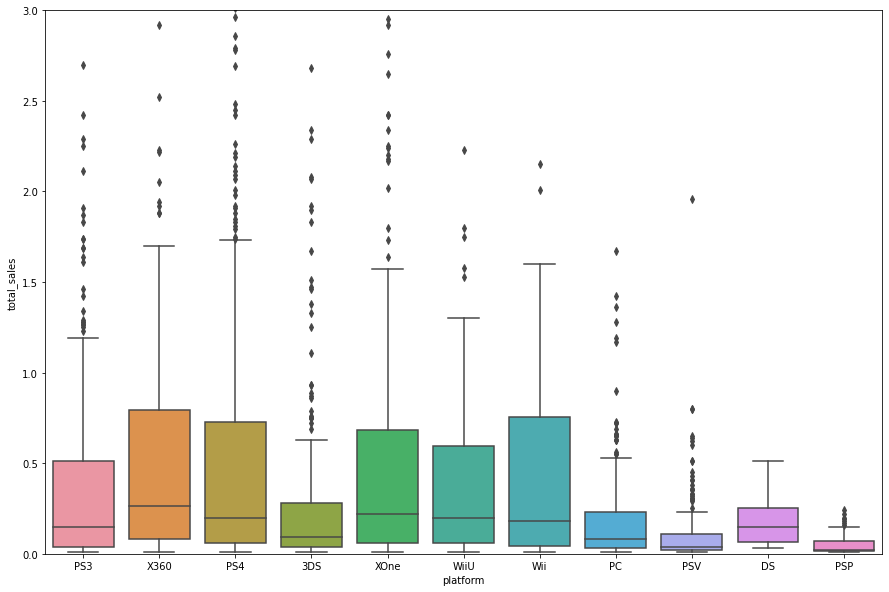

In [30]:
plt.figure(figsize=(15,10))
plt.ylim(0,3)
sns.boxplot(x='platform',y='total_sales',data=data);

La escala intertrimestral es muy similar a la de Platfor X360, PS3, PS4 y XOne. Tienen aproximadamente la misma mediana de aproximadamente 0,3 millones. El tercer cuartil termina en aproximadamente 0,7 millones. Todas las plataformas de distribución están biseladas a la derecha. Podemos decir que todas las cajas de la mediana se encuentran a la izquierda de la media. Las empresas con un interés de usuario a continuación tienen una mediana (segundo cuartil) de aproximadamente 0.1-0.2. Analizando las cajas del bigote, se puede ver que son similares a excepción de la plataforma 3DS. Tiene un tercer cuartil más pequeño que los otros. Podemos decir que la mediana de ventas de estas plataformas es casi la misma. Todas están biseladas a la derecha.

#### Impacto de los comentarios en las ventas

Veamos cómo se ven afectadas las ventas por las reseñas de los usuarios y los críticos usando el ejemplo de PlayStation 4. Construyamos un diagrama de dispersión y calculemos la correlación entre las reseñas y las ventas. 

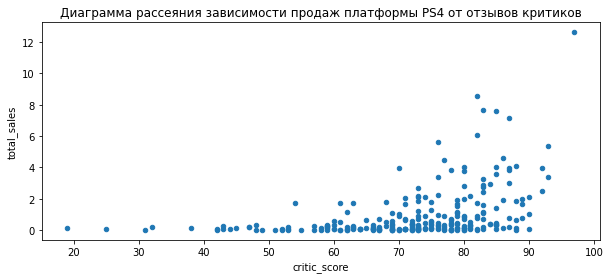

In [31]:
data.query('platform=="PS4" and critic_score > 0').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы PS4 от отзывов критиков');

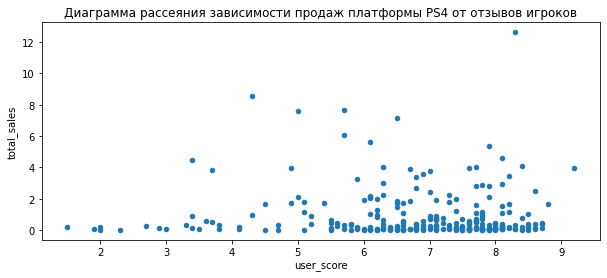

In [32]:
data.query('platform=="PS4" and user_score > 0').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4),title='Диаграмма рассеяния зависимости продаж платформы PS4 от отзывов игроков');

Los gráficos muestran que la dependencia de las ventas en las calificaciones está presente, pero no demasiado fuerte. Las ventas son mayores para los juegos más valorados, el corelling es positivo. Los juegos más vendidos tienen una calificación de 75-85 por los críticos. Las puntuaciones de los jugadores no tienen una dependencia de un dígito, en general, los juegos con una calificación de 5 a 9 se venden (simplemente no hay una calificación de 10).

Correlacionar los hallazgos con las ventas de juegos en otras plataformas.

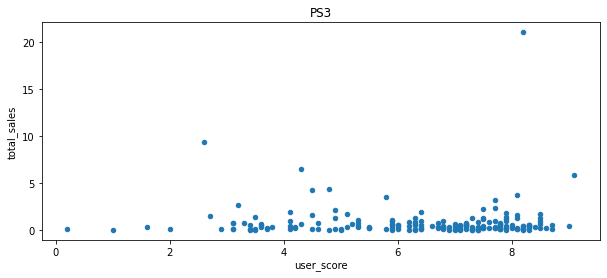

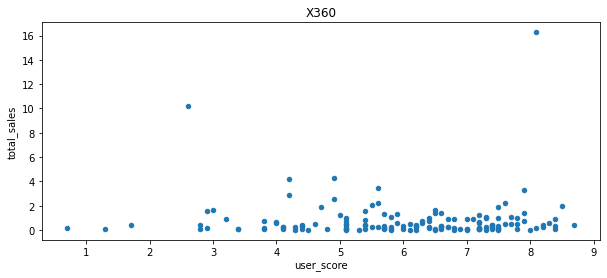

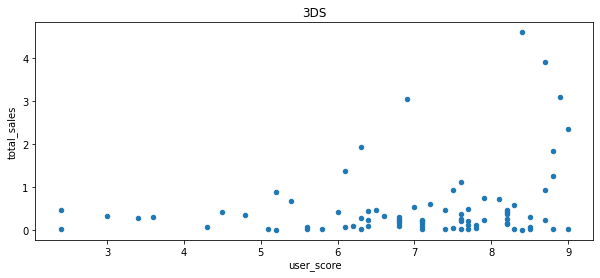

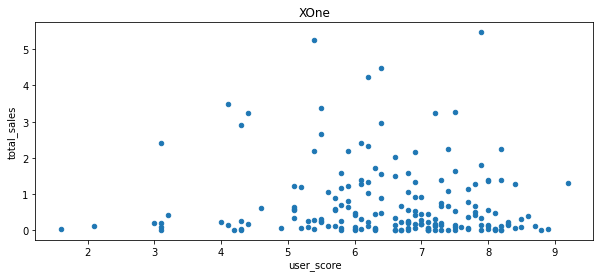

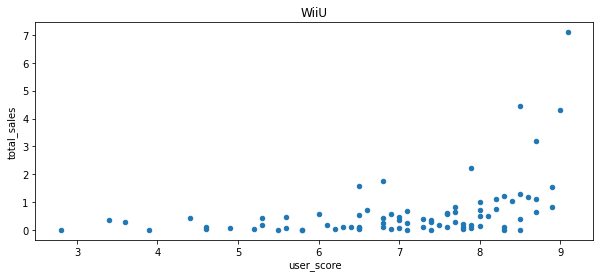

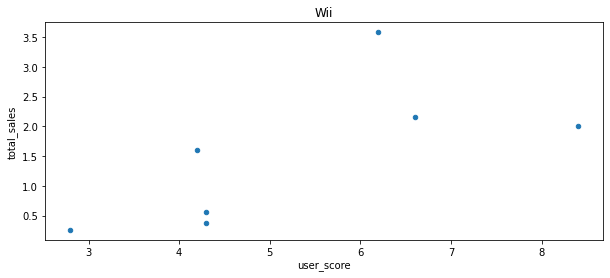

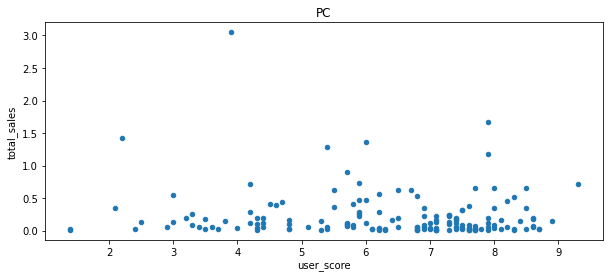

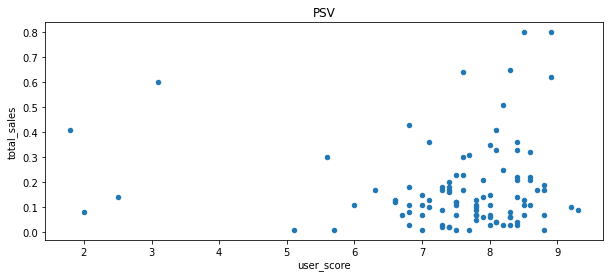

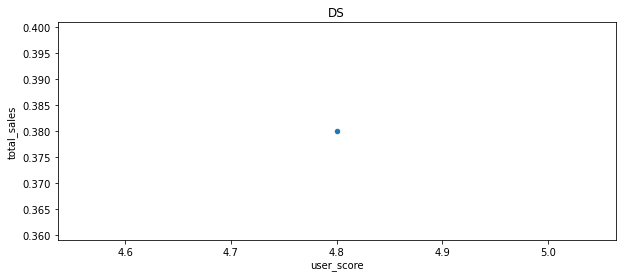

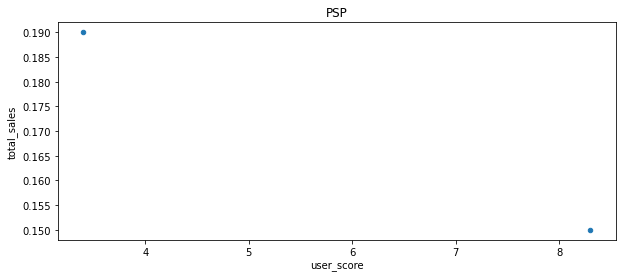

In [33]:
platforms = data.platform.unique()
platforms = list(platforms)
if "PS4" in platforms:
    platforms.remove("PS4")
for platform in platforms: #диаграммы рассеивания для пользовательских оценок
    data.query('platform==@platform and user_score > 0').sort_values(by='user_score',ascending=True).plot(kind='scatter',x='user_score',y='total_sales',figsize=(10,4),title=platform);


Nosotros observamos lo siguiente.
El PS3 tiene una corellication positiva, pero la dependencia no es fuerte. Las ventas altas comienzan en 4 puntos, e incluso hay emisiones en 2 puntos. Hay un éxito de ventas de 8 y ventas de más de 20 millones.
XboX 360 tiene una historia similar. Me pregunto si el éxito es el mismo, solo para esta plataforma.
El 3DS y WiiU tienen una mejor dependencia de las ventas en las altas calificaciones.
Con XOne y PC, la distribución de las ventas es uniforme y comienza con 5 puntos. Sin embargo, el PC tiene algún tipo de éxito de ventas con 4 puntos.
PS Vita vende principalmente juegos altamente calificados.
Wii, PSP y DS no evaluarán, porque. juegos vendidos con clasificaciones son muy pocos.

Repitamos el experimento de evaluación crítica.

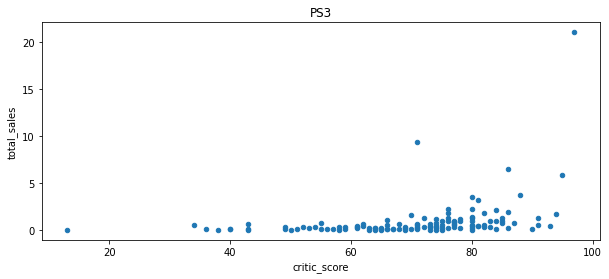

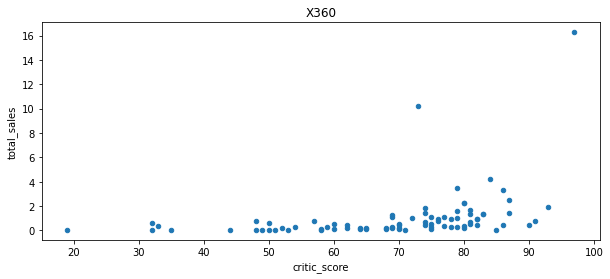

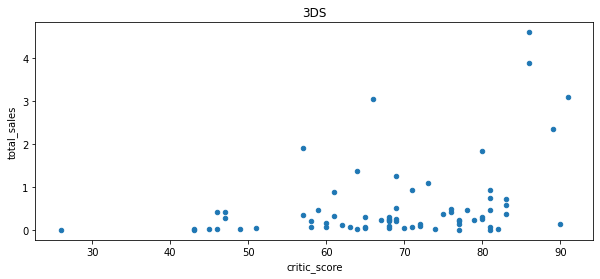

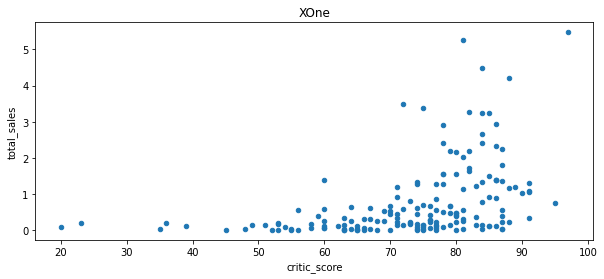

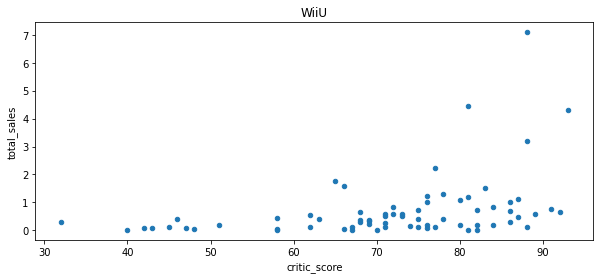

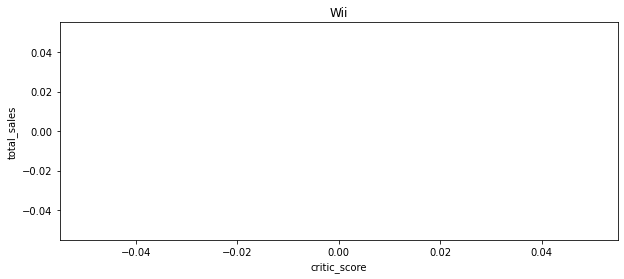

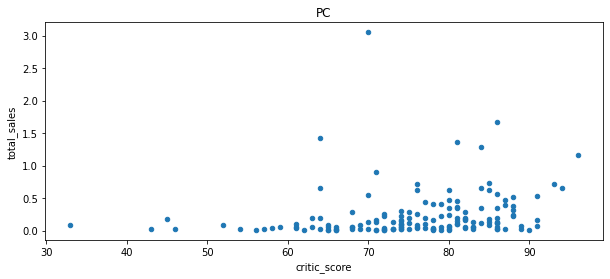

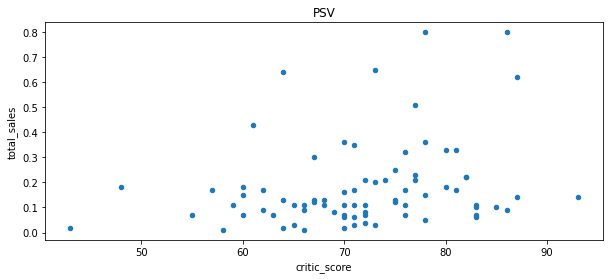

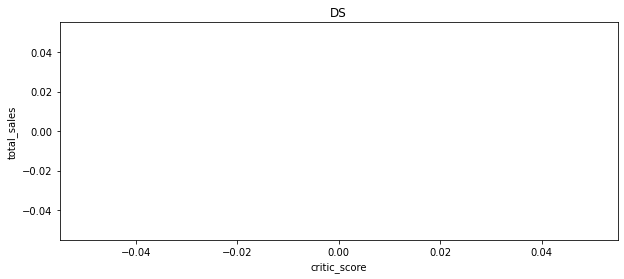

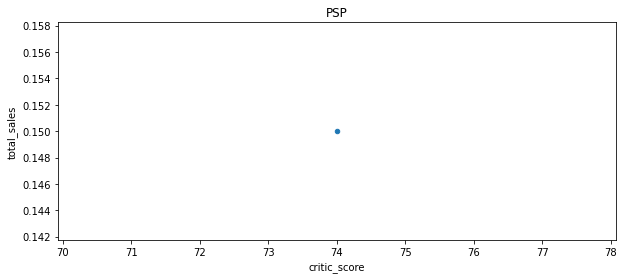

In [34]:
for platform in platforms: 
    data.query('platform==@platform and critic_score > 0').sort_values(by='critic_score',ascending=True).plot(kind='scatter',x='critic_score',y='total_sales',figsize=(10,4),title=platform);

PSP y DS no será considerado, porque. juegos con calificaciones críticas para los años actuales ya no son.
La PS3 tiene una dependencia de ventas directas de las calificaciones, y de nuevo vemos un éxito de ventas con las calificaciones críticas más altas. La misma historia es cierta para Xbox360, WiiU y 3DS. Xbox One tiene más éxitos, muestra muy claramente cómo las ventas dependen de la calificación. El PC también se vende mejor con una alta calificación, pero el éxito principal es el juego con una calificación de 70. PSVita generalmente no tiene juegos clasificados por debajo de 40 y la variación es similar.


### Distribución de juegos por género

Vamos a evaluar la distribución de los juegos por géneros.

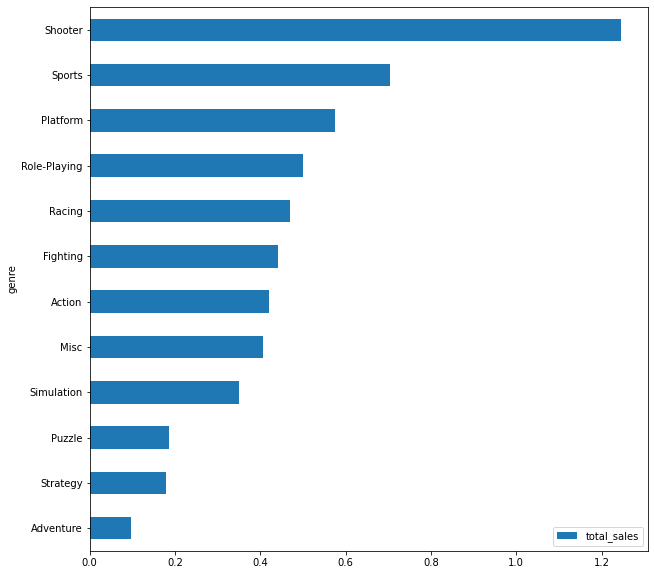

In [35]:
data.pivot_table(index='genre', aggfunc='mean', values='total_sales').sort_values(by='total_sales').plot.barh(stacked=True, figsize=(10,10));

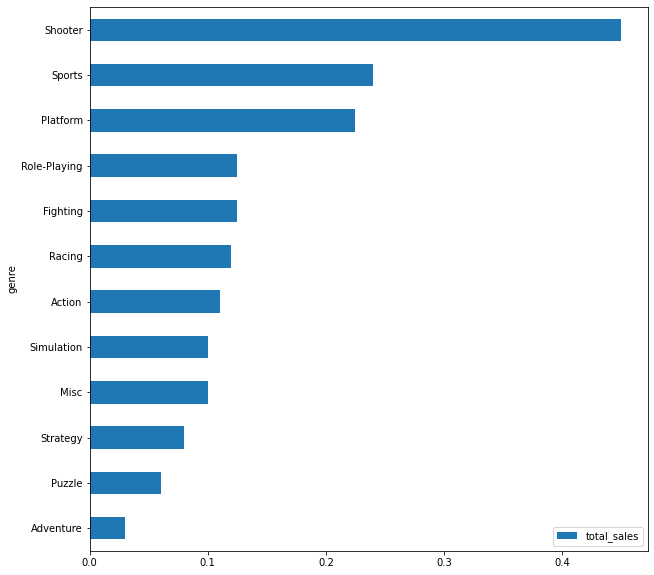

In [36]:
data.pivot_table(index='genre', aggfunc='median', values='total_sales').sort_values(by='total_sales').plot.barh(stacked=True, figsize=(10,10));

La mediana y el promedio de ventas han cambiado, la acción llegó hasta el séptimo lugar. ¿Quizás son simplemente más costosos y por lo tanto las ventas totales eran más altas a pesar de que las copias se vendieron menos?
Corregir los géneros más populares en la salida.

El género más rentable - tiradores, seguido de plataformas, deportes y juegos de rol. El menos rentable - misiones.

## Perfil de usuario de cada región

Definir el retrato para el usuario de cada región (NA, UE, JP).

### Plataformas más populares

Determina las 5 plataformas más populares por región.

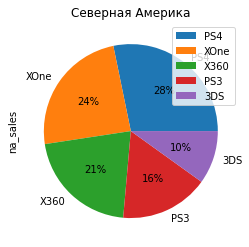

In [37]:
data.pivot_table(index='platform', aggfunc='sum', values='na_sales').sort_values(by='na_sales', ascending=False).head(5).plot(kind='pie', y='na_sales', autopct='%1.0f%%', title='Северная Америка');

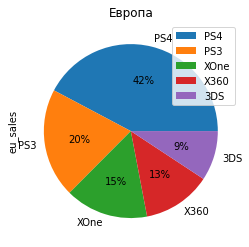

In [38]:
data.pivot_table(index='platform', aggfunc='sum', values='eu_sales').sort_values(by='eu_sales', ascending=False).head(5).plot(kind='pie', y='eu_sales', autopct='%1.0f%%', title='Европа');

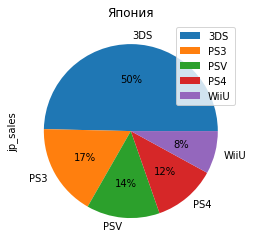

In [39]:
data.pivot_table(index='platform', aggfunc='sum', values='jp_sales').sort_values(by='jp_sales', ascending=False).head(5).plot(kind='pie', y='jp_sales', autopct='%1.0f%%', title='Япония');

En Norteamérica, la distribución entre plataformas populares es similar. Con un pequeño hueco y poca diferencia entre las últimas plataformas de juego de los dos principales competidores: PlayStation 4 y xBox One (28% y 24%, respectivamente). Les siguen las generaciones anteriores de plataformas de los mismos fabricantes: xBox 360 con 21% y PlayStation 3 con 16%. Curiosamente, la diferencia entre las generaciones de xBox es mucho menor, lo que significa que los jugadores no tienen prisa por actualizar la consola a una nueva, a diferencia de los fans de Sony. Cierra las cinco mejores consolas portátiles de Nintendo 3DS con un 10%.

En Europa, la mayoría elige la PlayStation, con ambas generaciones ocupando los dos primeros lugares (un total del 62%). La mayoría ya ha cambiado a PS4 (hasta un 42%). Seguido por las consolas xBox One y xBox 360, con un total del 28%. Cierra el top 5 de nuevo 3DS con un 9%.

En Japón, la situación es completamente diferente. En primer lugar, solo admiten a su fabricante, las consolas de Microsoft no están en demanda aquí. La Nintendo 3DS llega primero con hasta un 50% del mercado. Tres consolas Sony PlayStation le siguen, con la PlayStation Vita en tercer lugar con un 14%. El quinto lugar va a la Wii U con un 8%. Obviamente, los japoneses prefieren las consolas portátiles estacionarias, en total tienen hasta el 72% del mercado.

### Géneros más populares

Determine los 5 principales géneros populares por región.

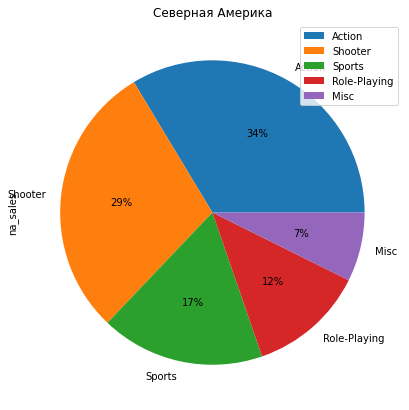

In [40]:
data.pivot_table(index='genre', aggfunc='sum', values='na_sales').sort_values(by='na_sales', ascending=False).head(5).plot(kind='pie', y='na_sales', autopct='%1.0f%%', title='Северная Америка', figsize=(7,7));

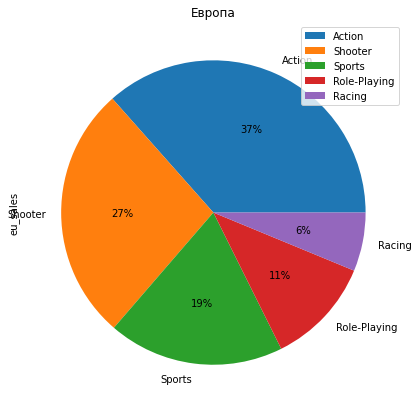

In [41]:
data.pivot_table(index='genre', aggfunc='sum', values='eu_sales').sort_values(by='eu_sales', ascending=False).head(5).plot(kind='pie', y='eu_sales', autopct='%1.0f%%', title='Европа', figsize=(7,7));

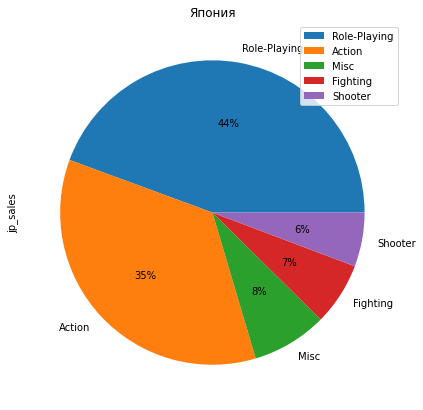

In [42]:
data.pivot_table(index='genre', aggfunc='sum', values='jp_sales').sort_values(by='jp_sales', ascending=False).head(5).plot(kind='pie', y='jp_sales', autopct='%1.0f%%', title='Япония', figsize=(7,7));

En América y Europa, prefieren los mismos géneros, incluso la proporción porcentual es aproximadamente la misma. En primer lugar están los juegos de acción (34-37%), seguidos de los shooters (27-29%), los juegos deportivos (17-19%) y los juegos de rol (11-12%). La única diferencia es que en América en quinto lugar del género mixto (7%) y en Europa - raza (6%).

En Japón, el juego de roles (44%), seguido por la acción (35%), el género mixto (8%), la lucha (7%) y los tiradores (6%), son los primeros lugares.

#### Impacto de la calificación ESRB

Veamos si la edad afecta las ventas.
Recuerde que llenamos los valores de saltos desconocidos. Aquí no los necesitamos, filtre el conjunto de datos

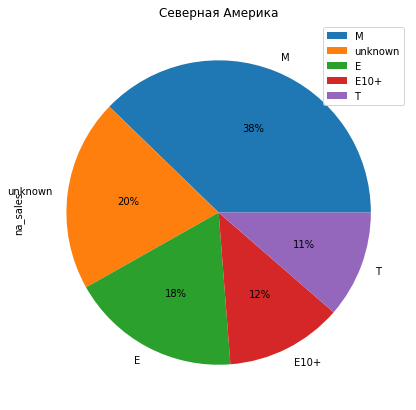

In [43]:
data.pivot_table(index='rating', aggfunc='sum', values='na_sales').sort_values(by='na_sales', ascending=False).plot(kind='pie', y='na_sales', autopct='%1.0f%%', title='Северная Америка', figsize=(7,7));

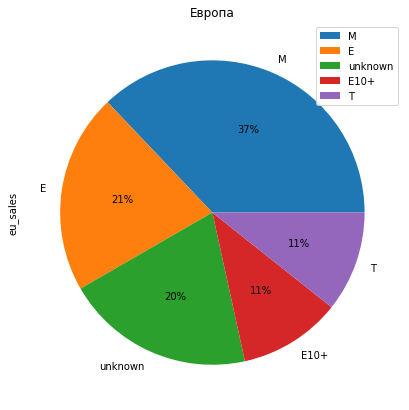

In [44]:
data.pivot_table(index='rating', aggfunc='sum', values='eu_sales').sort_values(by='eu_sales', ascending=False).plot(kind='pie', y='eu_sales', autopct='%1.0f%%', title='Европа', figsize=(7,7));

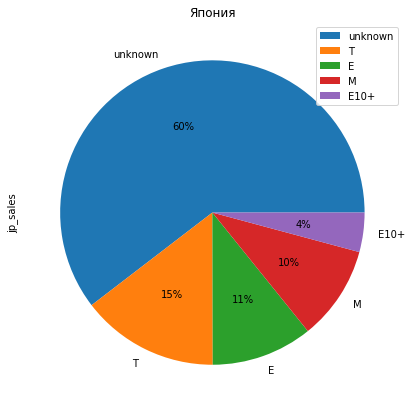

In [45]:
data.pivot_table(index='rating', aggfunc='sum', values='jp_sales').sort_values(by='jp_sales', ascending=False).plot(kind='pie', y='jp_sales', autopct='%1.0f%%', title='Япония', figsize=(7,7));

Tenga en cuenta que las calificaciones están en todas partes en el sistema ESRB de EE.UU. Europa y Japón tienen sus propios sistemas de calificación: PEGI y CERO.
En total tenemos cuatro valores: E10+ - adecuado para todos a partir de 10 años, T - Adolescente (adecuado para adolescentes a partir de 13 años), M - Maduro (para adultos de al menos 17 años) y E - Todo el mundo (adecuado para todos).

En América y Europa, la situación se repite de nuevo. Curiosamente, los juegos más vendidos para adultos (37-38%). Por otro lado, no es sorprendente, dado el amor por la acción y los tiradores con sangre, etc. parafernalia adulta. La mayoría de los bestsellers tienen esta calificación: GTA, Far Cry, Doom, Resident Evil, Red Dead Redemption, etc. El 20% son juegos con una calificación desconocida. Probablemente, no son liberados en Estados Unidos y tienen su propia clasificación de edad, que no tenemos. En segundo lugar en ambas regiones - juegos adecuados para todos (18-21%).

En Japón, la mayoría de los juegos (hasta un 60%) no tienen calificación. Dado que hemos aprendido que ambas consolas prefieren las suyas propias, y el género es diferente, es obvio que los juegos que más probablemente eligen su japonés, con su clasificación de edad en el sistema CERO. No tenemos tales datos, solo podemos entender que la principal elección que hacen no es a favor de los juegos estadounidenses.

## Hypothesis Testing

### Las valoraciones promedio de los usuarios de las plataformas Xbox One y PC son las mismas

Hipótesis nula: Las calificaciones de los usuarios de XOne y PC son iguales.
Hipótesis alternativa: La valoración del usuario de la plataforma XOne y el PC no son iguales.

In [46]:
xone_data = data.query('platform=="XOne" & user_score !=0')
pc_data = data.query('platform=="PC" & user_score !=0')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


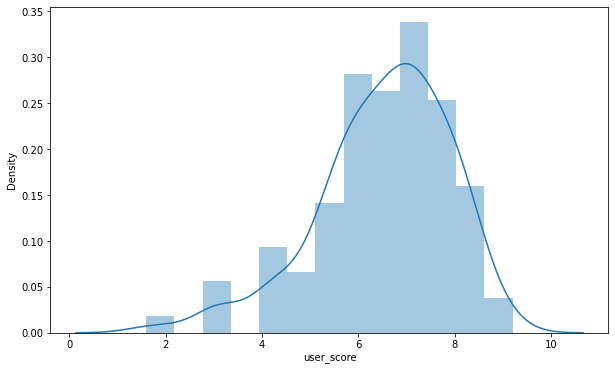

In [47]:
plt.figure(figsize=(10,6))
sns.distplot(xone_data['user_score']);

In [48]:
mean_xone = xone_data['user_score'].mean() 
print('Среднее значение пользовательского рейтинга платформы XOne:', mean_xone)
variance_xone = np.var(xone_data['user_score'], ddof=1) 
print('Дисперсия для платформы XOne:',variance_xone)
standart_deviation_xone = np.sqrt(variance_xone) 
print('Стандартное отклонение для платформы XOne:',standart_deviation_xone)
st_interval_xone = st.t.interval(0.95, len(xone_data['user_score'])-1, loc = np.mean(xone_data['user_score']), scale = st.sem(xone_data['user_score'])) #Доверительный интервал пользовательских рейтингов для платформы XOne
print('Доверительный 95% интервал для пользовательского рейтинга платформы XOne:',st_interval_xone)

Среднее значение пользовательского рейтинга платформы XOne: 6.521428571428572
Дисперсия для платформы XOne: 1.9069968429360695
Стандартное отклонение для платформы XOne: 1.380940564592144
Доверительный 95% интервал для пользовательского рейтинга платформы XOne: (6.319452023663737, 6.723405119193408)


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


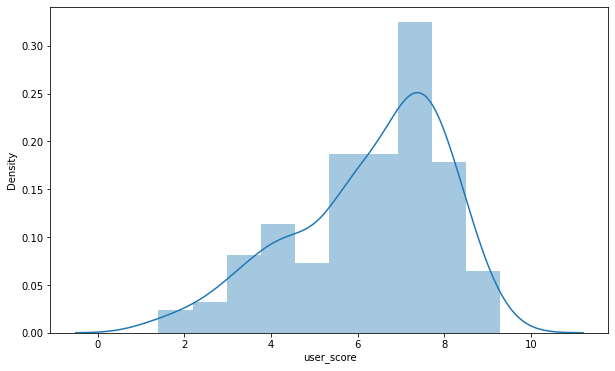

In [49]:
plt.figure(figsize=(10,6))
sns.distplot(pc_data['user_score']);

In [50]:
mean_pc = pc_data['user_score'].mean() #Среднее значение пользовательских рейтингов для платформы PC
print('Среднее значение пользовательского рейтинга платформы PC:', mean_pc)
variance_pc = np.var(pc_data['user_score'], ddof=1) #Дисперсия пользовательских рейтингов для платформы PC
print('Дисперсия для платформы PC:',variance_pc)
standart_deviation_pc = np.sqrt(variance_pc) #Стандартное отклонение пользовательских рейтингов для платформы PC
print('Стандартное отклонение для платформы PC:',standart_deviation_pc)
st_interval_pc = st.t.interval(0.95, len(pc_data['user_score'])-1, loc = np.mean(pc_data['user_score']), scale = st.sem(xone_data['user_score'])) #Доверительный интервал пользовательских рейтингов для платформы PC
print('Доверительный 95% интервал для пользовательского рейтинга платформы PC:',st_interval_pc)

Среднее значение пользовательского рейтинга платформы PC: 6.283974358974358
Дисперсия для платформы PC: 3.048193134822167
Стандартное отклонение для платформы PC: 1.7459075390243801
Доверительный 95% интервал для пользовательского рейтинга платформы PC: (6.081769534571682, 6.486179183377035)


Hipótesis nula: Las calificaciones de los usuarios de XOne y PC son iguales.

In [51]:
alpha = .05 #Статистическая значимость
result = st.ttest_ind(xone_data['user_score'],pc_data['user_score'],equal_var=False) 
# проверяем равенство двух независимых совокупностей. Значения дисперсий разные, поэтому equal_var=False
print('Значение p-value:', result.pvalue)
if result.pvalue<alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу не удалось')

Значение p-value: 0.17156613829336056
Отвергаем нулевую гипотезу не удалось


No se pudo rechazar la hipótesis nula. Los valores promedio de las dos muestras maestras de las calificaciones de usuario de XOne y PC son realmente iguales.

### Las valoraciones promedio de los usuarios de los géneros Acción y Deportes son diferentes

Hipótesis nula: Las valoraciones de los usuarios de Acción y Deportes son iguales.
Hipótesis alternativa: Reducir la valoración del usuario de Action to Sports.

In [52]:
action_data = data.query('genre=="Action" & user_score !=0')
sport_data = data.query('genre=="Sports" & user_score !=0')

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


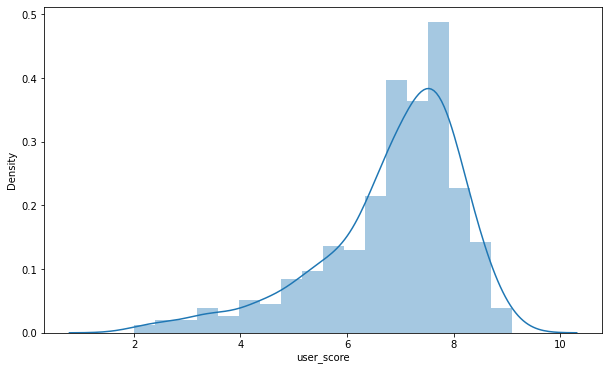

In [53]:
plt.figure(figsize=(10,6))
sns.distplot(action_data['user_score']);

In [54]:
mean_action=action_data['user_score'].mean()
print('Среднее значение жанра Action пользовательского рейтинга:',mean_action)
variance_action_data=np.var(action_data['user_score'],ddof=1)
print('Дисперсия жанра Action пользовательского рейтинга:',variance_action_data)
standart_deviation_action=np.sqrt(variance_action_data)
print('Стандартное отклонение жанра Action пользовательского рейтинга:',standart_deviation_action)
st_interval_action=st.t.interval(0.95, len(action_data['user_score'])-1, loc=np.mean(action_data['user_score']), scale=st.sem(action_data['user_score']))
print('Доверительный 95% интервал для пользовательского рейтинга жанра Action:',st_interval_action)

Среднее значение жанра Action пользовательского рейтинга: 6.841794871794871
Дисперсия жанра Action пользовательского рейтинга: 1.7718990837782609
Стандартное отклонение жанра Action пользовательского рейтинга: 1.3311269976145255
Доверительный 95% интервал для пользовательского рейтинга жанра Action: (6.70927268043978, 6.974317063149962)


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


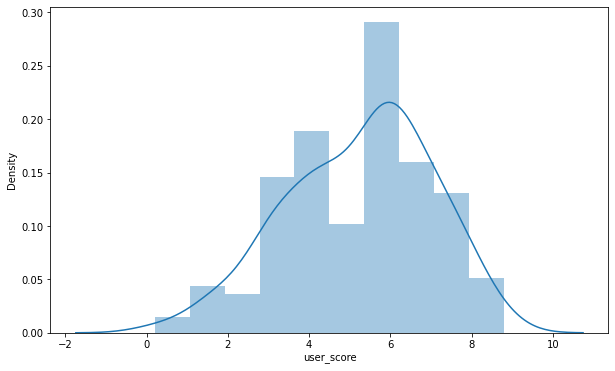

In [55]:
plt.figure(figsize=(10,6))
sns.distplot(sport_data['user_score']);

In [56]:
mean_sport=sport_data['user_score'].mean()
print('Среднее значение жанра Sport пользовательского рейтинга:',mean_sport)
variance_sport_data=np.var(sport_data['user_score'],ddof=1)
print('Дисперсия жанра Sport пользовательского рейтинга:',variance_sport_data)
standart_deviation_sport=np.sqrt(variance_sport_data)
print('Стандартное отклонение жанра Sport пользовательского рейтинга:',standart_deviation_sport)
st_interval_sport=st.t.interval(0.95, len(sport_data['user_score'])-1, loc=np.mean(sport_data['user_score']), scale=st.sem(sport_data['user_score']))
print('Доверительный 95% интервал для пользовательского рейтинга жанра Sport:',st_interval_sport)

Среднее значение жанра Sport пользовательского рейтинга: 5.238124999999999
Дисперсия жанра Sport пользовательского рейтинга: 3.180612814465409
Стандартное отклонение жанра Sport пользовательского рейтинга: 1.7834272663793747
Доверительный 95% интервал для пользовательского рейтинга жанра Sport: (4.9596657314482115, 5.516584268551787)


In [57]:
alpha=.05 
interested_value=mean_action 
result=st.ttest_1samp(sport_data['user_score'],interested_value) 
print('p-value:',result.pvalue)
if (result.pvalue/2<alpha) and (mean_sport<=interested_value):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

p-value: 2.6073714620239206e-22
Отвергаем нулевую гипотезу


La hipótesis nula es rechazada. La valoración media del usuario de Acción es mayor que la de Deportes.

La función ttest_ind se utilizó para formular hipótesis nulas. En primer lugar, se comparó el promedio de dos poblaciones, y luego con significación estadística. Se estableció en el 5%.

## Conclusión general

Por lo tanto, hemos identificado plataformas potencialmente lucrativas, géneros, juegos eliminados por año y clasificaciones ordenadas.

Dejamos solo juegos lanzados desde 2013 - ahora se están vendiendo mejor. Plataformas de juego para las que hay que vender juegos: PlayStation 3, PlayStaton 4, xBox 360, xBox One, Nintendo 3DS, así como dejar una pequeña gama para los fans de PC, PS Vita y Wii U. Los principales géneros que deben mantenerse en la gama de tiradores, juegos de plataformas y deportes. Se necesitan más juegos de rol para consolas portátiles. Lo más probable es que sean de fabricantes japoneses, porque la mayoría de los compradores en Japón prefiere sus juegos. Y, por supuesto, no os olvidéis de las valoraciones tanto de los usuarios como de los críticos. Cuanto más alto sea, mejores serán las ventas del juego. 